#                            EMOTION RECOGNITION USING SPEECH

## Introduction

The bottom line objective of this project is to classify the emotions of people with the help of speech. 
Speech is the most natural way of expressing ourselves as humans. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

## Librosa

The most important python library which is used for the whole project is Librosa. It is used for analyzing audio and music. It has a flatter package layout, standardizes interfaces and names, backwards compatibility, modular functions, and readable code

## Dataset 

The dataset used for this project is RAVDESS. this is the Ryerson Audio-Visual Database of Emotional Speech and Song dataset, and is free to download. This dataset has 7356 files rated by 247 individuals 10 times on emotional validity, intensity, and genuineness.<br>
In the RAVDESS, there are two types of data: speech and song.<br>
The database contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral    North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.<br>
Here, we are using only the speech data and you can download the dataset from this link https://zenodo.org/record/1188976#.XwTpxShKjIV. The zip file used in this project is 'Audio_Speech_Actors_01-24.zip'.<br> 
The files in this dataset follow a particular convention which itself labels the data.

### Filename identifiers 

1. Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
2. Vocal channel (01 = speech, 02 = song).
3. Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
4. Emotional intensity (01 = normal, 02 = strong). 
5. Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
6. Repetition (01 = 1st repetition, 02 = 2nd repetition).

NOTE: There is no strong intensity for the 'neutral' emotion.
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


## Process Flow

This project can be done in these four steps
1. Data preparation: The collection and manipulation of items of data to produce meaningful information.
2. Feature extraction: Feature extraction is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing.
3. Building a model: A Multi Layer Perceptron model is built for classifying the emotions. 
4. Testing the model: Testing the built model on a new set of data.

#### Importing the necessary libraries 

In [20]:
import os
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display as ipd #for the audio signal display
import sklearn
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier #Multi Layer Perceptron Classifier
from sklearn.metrics import accuracy_score #For testing the accuracy of the model
from sklearn.model_selection import train_test_split #Splitting the dataset
from sklearn import metrics

## 1.Data Preparation

The files in the data set are in the above mentioned format. So, these files should be extracted to a data frame along with the labels

In [11]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
gender=[]
emotion=[]
for file in glob.glob("C:/Users/Owner/Downloads/RAVDESS/Actor_*/*.wav"):
        file_name=os.path.basename(file) #grabbing the filename from the path
        temp=emotions[file_name.split("-")[2]] #grabbing the emotion from the filename
        emotion.append(temp)
        temp=int(file_name.split("-")[5]) #grabbing the gender from the filename
        if temp%2 == 0:
            temp="female"
        else:
            temp="male"
        gender.append(temp)

In [12]:
temp1=pd.DataFrame(emotion) #creating a temporary dataframe for emotion
temp2=pd.DataFrame(gender) #creating a temporary dataframe for gender
df=pd.concat([temp2,temp1],axis=1) #concatinating two dataframes
df.columns=['gender','emotion']
df['gender_emotion'] =df.gender + '_' + df.emotion #concatinating the gender and emotion
df.head()

,gender,emotion,gender_emotion
0,male,neutral,male_neutral
1,female,neutral,female_neutral
2,male,neutral,male_neutral
3,female,neutral,female_neutral
4,male,calm,male_calm


In [13]:
print(df.gender_emotion.value_counts())

female_fearful      96
male_surprised      96
female_disgust      96
male_calm           96
female_angry        96
male_fearful        96
male_sad            96
female_surprised    96
female_happy        96
female_sad          96
male_angry          96
male_happy          96
female_calm         96
male_disgust        96
male_neutral        48
female_neutral      48
Name: gender_emotion, dtype: int64


## 2.Feature extraction

Let us consider a single audio signal and extract some features from that signal

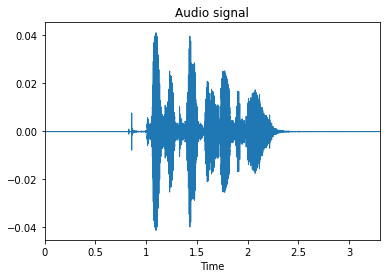

In [14]:
voice,sr = librosa.load("C:/Users/Owner/Downloads/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav")
librosa.display.waveplot(voice, sr=sr)
plt.title('Audio signal')
ipd.Audio(voice, rate=sr)

Librosa library is used to extract an audio signal from the .wav file.This is how an audio signal looks in time domain

### Mel Frequency Cepstral Coefficients (MFCC)

The first step in any automatic speech recognition system is to extract features i.e. identify the components of the audio signal that are good for identifying the linguistic content and discarding all the other stuff which carries information like background noise, emotion etc.<br>
The main point to understand about speech is that the sounds generated by a human are filtered by the shape of the vocal tract including tongue, teeth etc. This shape determines what sound comes out. If we can determine the shape accurately, this should give us an accurate representation of the phoneme being produced. The shape of the vocal tract manifests itself in the envelope of the short time power spectrum, and the job of MFCCs is to accurately represent this envelope.<br>
Librosa provides a function to extract the mfcc.

(40, 143)


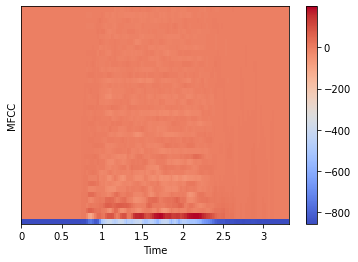

In [37]:
mfcc = librosa.feature.mfcc(y=voice, sr=sr, n_mfcc=40) #number of MFCC features
print(mfcc.shape)
librosa.display.specshow(mfcc, x_axis='time') #To display the plot of MFCC's
plt.ylabel('MFCC')
plt.colorbar()

Here the whole audio signal of 3 seconds is divided into 143 frames and the function above has computed 40 MFCC's in 143 frames

In [38]:
mfcc

array([[-857.30945, -857.30945, -857.30945, ..., -857.30945, -857.30945,
        -857.30945],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

## Mel Spectogram

A mel spectrogram is a spectrogram where the frequencies of a sound signal are converted to the mel scale. This is another function of Librosa which helps in gaining some more insights on the sound signal we have.

### Mel scale

Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same.<br>
In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale.

(128, 143)


Text(0.5, 1.0, 'Melspectrogram')

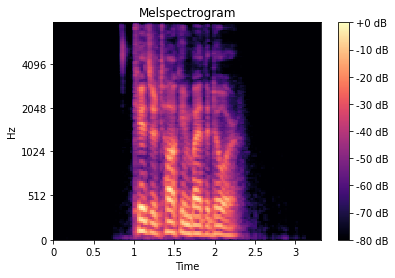

In [42]:
mel=librosa.feature.melspectrogram(y=voice, sr=sr)
mel_dB = librosa.power_to_db(mel, ref=np.max)
print(mel_dB.shape)
librosa.display.specshow(mel_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Melspectrogram')

Now we have to build a model which computes all these features and provides the desired output

## 3.Building the Model

Intially we shall write a function that combines all these features and assign them to the corresponding label

In [73]:
def features(file):
    X,sr = librosa.load(file)
    feature=np.array([])
    mfcc=np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40), axis=1)
    feature=np.hstack((feature, mfcc))
    mel=np.mean(librosa.feature.melspectrogram(X, sr=sr),axis=1)
    feature=np.hstack((feature, mel))
    return feature

For MFCC the mean is taken along the row so that the features of a particular signal are combined. The same process is followed for Mel aswell. Here np.hstack is used to horizontally stack all the features

Here, to get a better accuracy we are using the most important emotions out of all the emotions

In [74]:
known_emotions=['calm', 'happy', 'fearful', 'disgust']

In [75]:
x,y=[],[]
for file in glob.glob("C:/Users/Owner/Downloads/RAVDESS/Actor_*/*.wav"):
    file_name=os.path.basename(file)
    feature=features(file)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in known_emotions:
        continue
    x.append(feature)
    y.append(emotion)

## Multi Layer Perceptron

In [76]:
x_train,x_test,y_train,y_test=train_test_split(np.array(x), y, test_size=0.2, random_state=9)
model=MLPClassifier(alpha=0.01, batch_size=256,epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
report=metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        calm       0.84      0.61      0.71        44
     disgust       0.57      0.88      0.69        41
     fearful       0.74      0.70      0.72        33
       happy       0.82      0.64      0.72        36

    accuracy                           0.71       154
   macro avg       0.74      0.71      0.71       154
weighted avg       0.74      0.71      0.71       154



In [78]:
accuracy

0.7077922077922078